<a href="https://colab.research.google.com/github/gusti-amber/udemy_pytorch/blob/main/lecture/lec2_simple_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 手描き文字の読み込みと表示



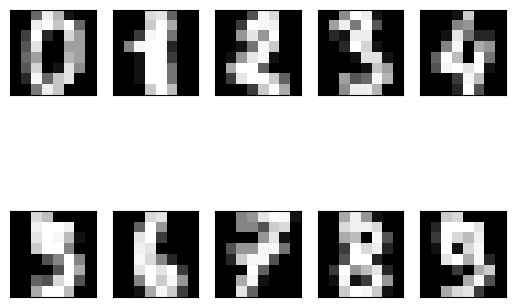

データの形状:  (1797, 64)
ラベル:  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()

n_img = 10 # 表示する文字画像の数
for i in range(n_img):
  ax = plt.subplot(2,5,i+1) # 2行5列でプロット, (i+1)番目に画像を配置
  plt.imshow(digits_data.data[i].reshape(8,8), cmap="Grays_r")
  ax.get_xaxis().set_visible(False) # x軸の非表示
  ax.get_yaxis().set_visible(False) # y軸の非表示
plt.show()

print("データの形状: ", digits_data.data.shape)
print("ラベル: ", digits_data.target[:n_img])

In [ ]:
# 2. データを訓練用とテスト用に分割

In [ ]:
import torch
from sklearn.model_selection import train_test_split

digit_images = digits_data.data
labels = digits_data.target

# 訓練用の入力データ: x_train, 訓練用の正解データ: t_train, 訓練用は合計75%(デフォルト設定)
# テスト用の入力データ: x_test, テスト用の正解データ: t_test, テスト用は残り25%
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels)

# 各データをTensorに変換
x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)

x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64)


# 3. モデル構築

In [ ]:
from torch import nn

# NNの定義
net = nn.Sequential(
    nn.Linear(64,32), # 全結合層
    nn.ReLU(),        # 活性化関数
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)
